In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

/home/tony/dnn/anaconda2/envs/myjupyter/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


y_train.shape:(50000, 1)
y_train[0]:array([6], dtype=uint8)


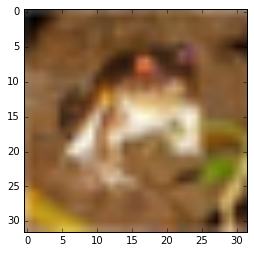

In [13]:
print("y_train.shape:%r" % (y_train.shape,))
print("y_train[0]:%r" % (y_train[0]))
plt.imshow(x_train[0])

In [14]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 454s 290ms/step - loss: 1.8431 - acc: 0.3197 - val_loss: 1.5826 - val_acc: 0.4353
Epoch 2/100
1563/1563 [==============================] - 449s 287ms/step - loss: 1.5854 - acc: 0.4210 - val_loss: 1.4190 - val_acc: 0.4881
Epoch 3/100
1563/1563 [==============================] - 449s 287ms/step - loss: 1.4749 - acc: 0.4678 - val_loss: 1.3569 - val_acc: 0.5150
Epoch 4/100
1563/1563 [==============================] - 450s 288ms/step - loss: 1.3999 - acc: 0.4964 - val_loss: 1.2336 - val_acc: 0.5675
Epoch 5/100
1563/1563 [==============================] - 449s 287ms/step - loss: 1.3409 - acc: 0.5233 - val_loss: 1.1827 - val_acc: 0.5844
Epoch 6/100
1563/1563 [==============================] - 447s 286ms/step - loss: 1.2887 - acc: 0.5449 - val_loss: 1.1513 - val_acc: 0.5944
Epoch 7/100
1563/1563 [==============================] - 446s 285ms/step - loss: 1.2528 - acc: 0.5574 - val_loss: 1.1283 - val_acc:

1563/1563 [==============================] - 487s 312ms/step - loss: 1.8174 - acc: 0.3746 - val_loss: 1.6076 - val_acc: 0.4307
Epoch 60/100
1563/1563 [==============================] - 454s 290ms/step - loss: 1.8138 - acc: 0.3770 - val_loss: 1.6515 - val_acc: 0.4162
Epoch 61/100
1563/1563 [==============================] - 463s 296ms/step - loss: 1.8265 - acc: 0.3739 - val_loss: 1.6158 - val_acc: 0.4365
Epoch 62/100
1563/1563 [==============================] - 477s 305ms/step - loss: 1.8196 - acc: 0.3713 - val_loss: 1.5313 - val_acc: 0.4670
Epoch 63/100
1563/1563 [==============================] - 490s 313ms/step - loss: 1.8231 - acc: 0.3667 - val_loss: 1.7588 - val_acc: 0.3861
Epoch 64/100
1563/1563 [==============================] - 470s 301ms/step - loss: 1.8314 - acc: 0.3677 - val_loss: 1.6477 - val_acc: 0.4301
Epoch 65/100
1563/1563 [==============================] - 489s 313ms/step - loss: 1.8393 - acc: 0.3666 - val_loss: 1.5090 - val_acc: 0.4593
Epoch 66/100
1563/1563 [=========